# Youtube Exploratory Data Analisis

## Exploratory Data Analisis Abstract

### Continuos Variable Analisis

    - almost all of our continuos variables have an exponential distribution so we should keep that in mind when picking what models to use to best make predictions based on this data.
    
    - Likes, Veiws, and comments all seem to be positivly corelated with eachother which intuitivly makes sense, this means that when we make our models we should consider only choosing likes or comments in order to reduce multicoliniarity.
### Catigorical Variable Analisis

    - Politics, Sports, Entertainment, and Gaming are the most popular catigories on Youtube.
    
    - Almost all of the 2000 videos I collected were in high definition.

### Pivot Table Analisis

    - The first thing i noticed was that non-profits had on averedge the most veiws but the the lowes veiwer interation scores. this was very curios untill I looked at the catigories by video duration where you can see that on averedge non-profit videos are only around 30 seconds which means they are probalby just youtube shorts that they use as ads so people get them in there feeds but just skip over them.

    - Politics had the highest coment to veiw ratio which is very interesting an intuitivly makes sense bucause it is a very emotinal topic that people have alot of opinions about.

    - Science and technology way the third most viewed type of video which i found suprising because i figured most people would find that topic boring.

    - Education videos had one of the lower averede veiw counts but one of the higher averedge comment counts. I would bet this is because people leave alot of comments asking for more details on how to do whatever it is the video is trying to teach. Auto and veichle videos had a simmilar phenominon which i would argue was for the same reason.

# EDA Process

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Import Data

In [2]:
df = pd.read_csv('YT_data_cleaned.csv')
df.head()

,video_id,title,desc,cat_id,vid_duration,dimension,definition,likes,comments,veiws,desc_length,like_veiw_ratio,comment_veiw_ratio
0,NO_ZdJjMtdI,Juice WRLD - Face 2 Face (Official Music Video),"Juice WRLD ""Face 2 Face"" is available now: htt...",Music,3.200000,2d,hd,145123,11470,1147253,548,0.126496,0.009998
1,D9_VV0yCDos,4 tricks that Sumail does that you don't,"In this video, Jenkins talks about 4 unique tr...",Gaming,10.083333,2d,hd,9169,469,419672,315,0.021848,0.001118
2,jVN6kc12pbU,The most garbage habit in each Dota role,"In this video, Jenkins talks about the WORST h...",Gaming,12.733333,2d,hd,12668,1091,540192,278,0.023451,0.002020
3,Gzl2rWCystk,Taqdeer Episode 41 | Teaser | ARY Digital Drama,To Watch all the episode of Taqdeer : https://...,Entertainment,0.783333,2d,hd,12106,99,820003,1398,0.014763,0.000121
4,sC2oufyWWis,Good Shepherd Household Relief Loans,Household Relief Loans Without Interest are av...,People_and_Blogs,0.500000,2d,hd,1,0,431969,449,0.000002,0.000000


# Continuos Variable Analisis

In [3]:
df.columns

Index(['video_id', 'title', 'desc', 'cat_id', 'vid_duration', 'dimension',
       'definition', 'likes', 'comments', 'veiws', 'desc_length',
       'like_veiw_ratio', 'comment_veiw_ratio'],
      dtype='object')

In [19]:
df_conti = df[['vid_duration', 'likes', 'comments', 'veiws', 'desc_length', 'like_veiw_ratio', 'comment_veiw_ratio']]

## Create Histograms for Continuos Vars

Histogram of vid_duration


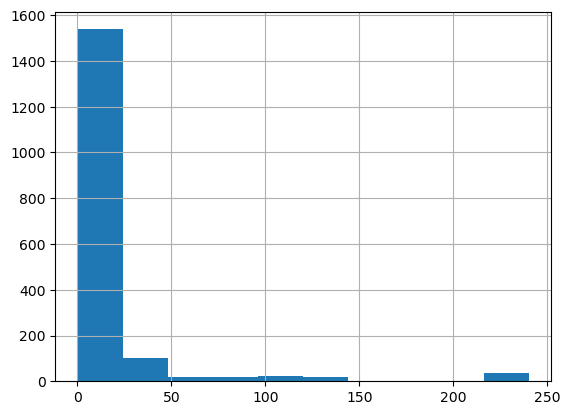

Histogram of likes


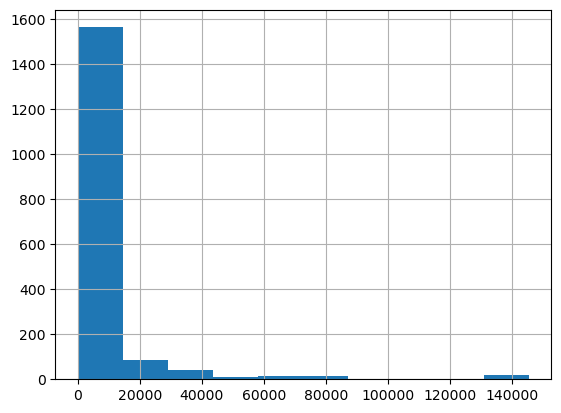

Histogram of comments


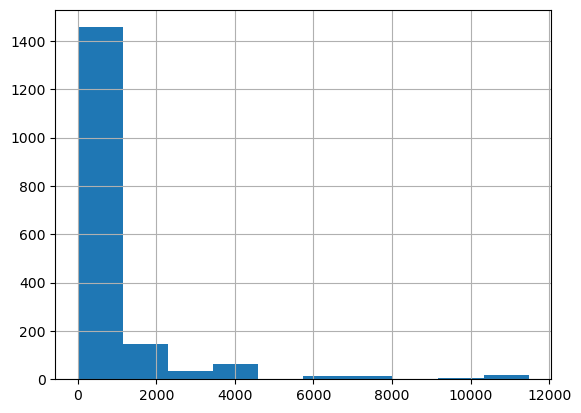

Histogram of veiws


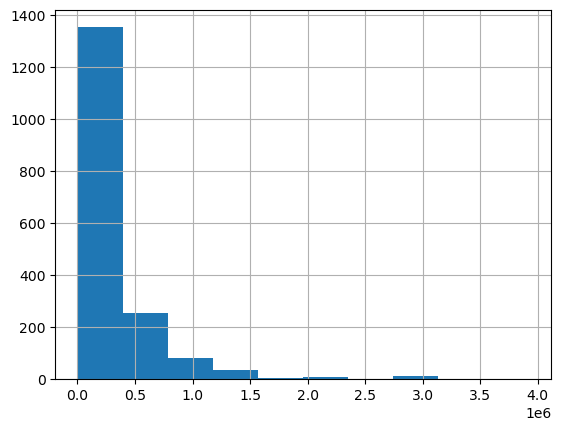

Histogram of desc_length


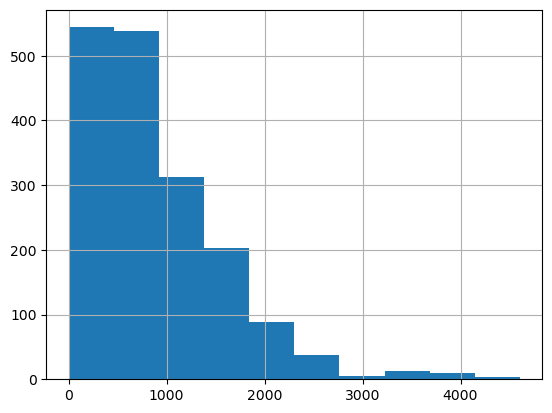

Histogram of like_veiw_ratio


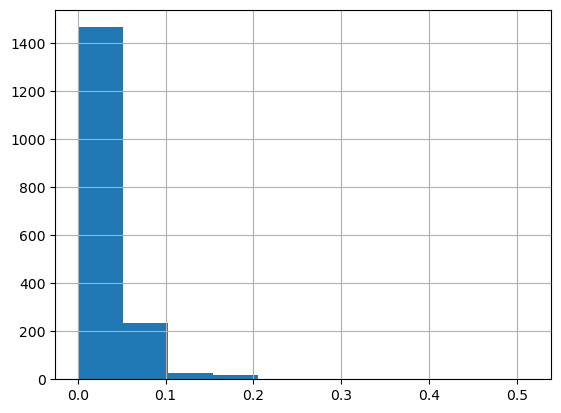

Histogram of comment_veiw_ratio


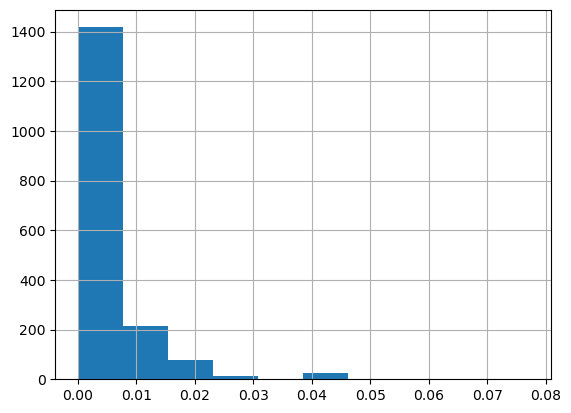

In [20]:
for k in df_conti:
    print("Histogram of %s" %(k))
    df_conti[k].hist()
    plt.show()

It looks like almost all of our continuos variables have an exponential distribution so we should keep that in mind when picking what models to use to best make predictions based on this data.

## Corelation Heatmap Of Continuos Variables

In [21]:
df_conti.corr()

,vid_duration,likes,comments,veiws,desc_length,like_veiw_ratio,comment_veiw_ratio
vid_duration,1.000000,0.052793,-0.051448,0.063738,-0.014380,0.027532,-0.125447
likes,0.052793,1.000000,0.806288,0.570727,0.019548,0.361684,0.008843
comments,-0.051448,0.806288,1.000000,0.449274,0.033757,0.250074,0.217052
veiws,0.063738,0.570727,0.449274,1.000000,0.090958,-0.055883,-0.174287
desc_length,-0.014380,0.019548,0.033757,0.090958,1.000000,-0.072574,-0.063562
like_veiw_ratio,0.027532,0.361684,0.250074,-0.055883,-0.072574,1.000000,0.289265
comment_veiw_ratio,-0.125447,0.008843,0.217052,-0.174287,-0.063562,0.289265,1.000000


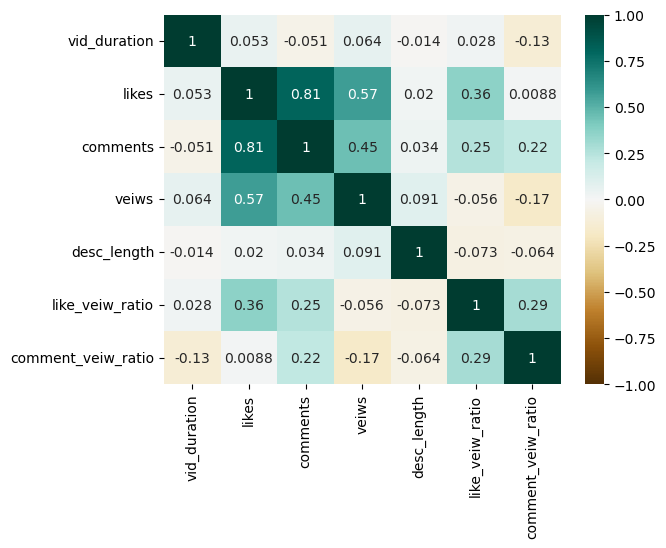

In [22]:
heatmap = sns.heatmap(df_conti.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

Likes, Veiws, and comments all seem to be positivly corelated with eachother which intuitivly makes sense, this means that when we make our models we should consider only choosing likes or comments in order to reduce multicoliniarity.

# Catigorical Variable Analisis

In [8]:
df.columns

Index(['video_id', 'title', 'desc', 'cat_id', 'vid_duration', 'dimension',
       'definition', 'likes', 'comments', 'veiws', 'desc_length',
       'like_veiw_ratio', 'comment_veiw_ratio'],
      dtype='object')

In [9]:
df_cat = df[['cat_id',  'dimension', 'definition',]]

Bargraph of cat_id : Total Catigories 15


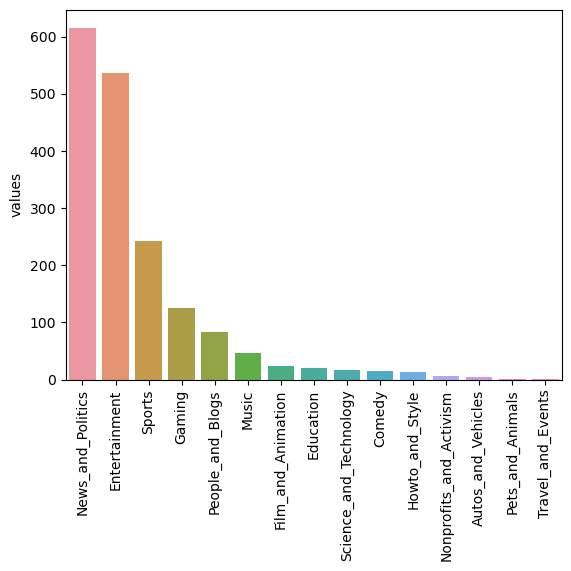

Bargraph of dimension : Total Catigories 1


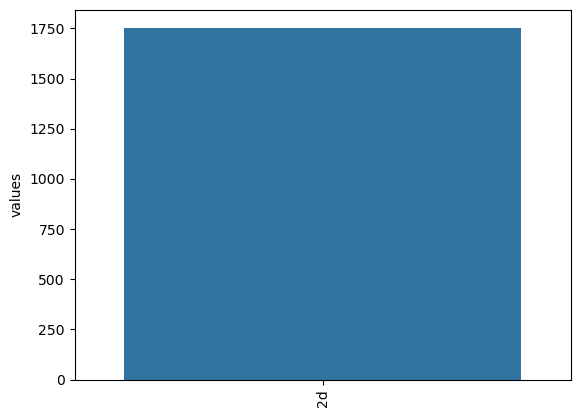

Bargraph of definition : Total Catigories 2


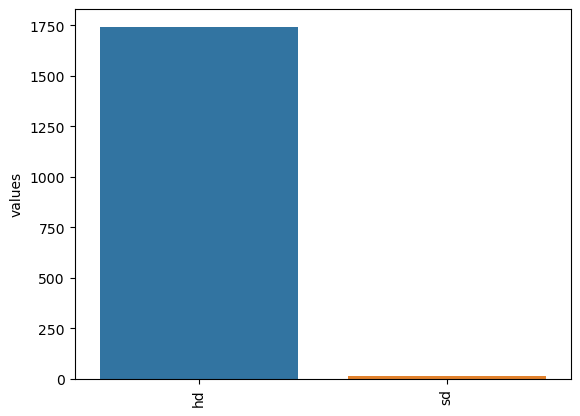

In [10]:
for k in df_cat:
    print("Bargraph of %s : Total Catigories %d" %(k, len(df_cat[k].value_counts())))
    sns.barplot(x=df_cat[k].value_counts().index, y=df_cat[k].value_counts(), linewidth=0)
    plt.ylabel('values')
    plt.xticks(rotation= 90)
    plt.show()

The most interesting conclutions that can be drawn from these graphs is that Politics, Sports, Entertainment, and Gaming are the most popular catigories on Youtube. It call also be seen that all of the 2000 videos i colected are two dimentinal and almost all of them are in high definition.

# Pivot Tables

In [11]:
df.columns

Index(['video_id', 'title', 'desc', 'cat_id', 'vid_duration', 'dimension',
       'definition', 'likes', 'comments', 'veiws', 'desc_length',
       'like_veiw_ratio', 'comment_veiw_ratio'],
      dtype='object')

In [12]:
pd.set_option('display.max_rows', None)

### Video Catigory by Veiws

In [13]:
df.pivot_table( index= ['cat_id'], values = 'veiws', aggfunc = np.mean).sort_values('veiws', ascending= False)

,veiws
cat_id,
Nonprofits_and_Activism,1.561653e+06
Music,9.637804e+05
Science_and_Technology,8.630377e+05
Travel_and_Events,6.235580e+05
Film_and_Animation,5.169662e+05
Entertainment,3.731402e+05
Gaming,3.201841e+05
People_and_Blogs,3.003008e+05
Autos_and_Vehicles,2.818105e+05


### Video Catigory by likes

In [14]:
df.pivot_table( index= ['cat_id'], values = 'likes', aggfunc = np.mean).sort_values('likes', ascending= False)

,likes
cat_id,
Music,70027.404255
Science_and_Technology,65400.529412
Autos_and_Vehicles,13982.500000
People_and_Blogs,11650.571429
Gaming,9299.539683
Entertainment,7987.287313
Education,7011.047619
Comedy,6281.733333
Film_and_Animation,5370.000000


### Video Catigory by Like To Veiw Ratio

In [15]:
df.pivot_table( index= ['cat_id'], values = 'like_veiw_ratio', aggfunc = np.mean).sort_values('like_veiw_ratio', ascending= False)

,like_veiw_ratio
cat_id,
Music,0.101556
Science_and_Technology,0.081283
People_and_Blogs,0.060818
Autos_and_Vehicles,0.051800
Education,0.041618
Comedy,0.031717
Gaming,0.028698
Sports,0.027899
News_and_Politics,0.026779


### Video Catigory by Comments

In [17]:
df.pivot_table( index= ['cat_id'], values = 'comments', aggfunc = np.mean).sort_values('comments', ascending= False)

,comments
cat_id,
Science_and_Technology,5926.882353
Music,5923.638298
Autos_and_Vehicles,1743.750000
News_and_Politics,951.675325
Education,661.619048
Comedy,600.000000
People_and_Blogs,593.773810
Film_and_Animation,561.791667
Gaming,520.888889


### Video Catigory by Comment To Veiw Ratio

In [16]:
df.pivot_table( index= ['cat_id'], values = 'comment_veiw_ratio', aggfunc = np.mean).sort_values('comment_veiw_ratio', ascending= False)

,comment_veiw_ratio
cat_id,
News_and_Politics,0.008847
Education,0.006856
Science_and_Technology,0.006689
Autos_and_Vehicles,0.006332
Music,0.006177
Sports,0.005263
People_and_Blogs,0.004189
Howto_and_Style,0.002665
Film_and_Animation,0.002450


### Video Catigory by Video Duration

In [18]:
df.pivot_table( index= ['cat_id'], values = 'vid_duration', aggfunc = np.mean).sort_values('vid_duration', ascending= False)

,vid_duration
cat_id,
Travel_and_Events,238.216667
Film_and_Animation,54.594444
People_and_Blogs,39.887698
Howto_and_Style,32.105128
News_and_Politics,25.295022
Autos_and_Vehicles,25.083333
Comedy,13.015556
Education,11.737302
Sports,9.826240


## Pivot Table Conclutions
    - The first thing i noticed was that non-profits had on averedge the most veiws but the the lowes veiwer interation scores. this was very curios untill I looked at the catigories by video duration where you can see that on averedge non-profit videos are only around 30 seconds which means they are probalby just youtube shorts that they use as ads so people get them in there feeds but just skip over them.
    
    - Politics had the highest coment to veiw ratio which is very interesting an intuitivly makes sense bucause it is a very emotinal topic that people have alot of opinions about.
    
    - Science and technology way the third most viewed type of video which i found suprising because i figured most people would find that topic boring.
    
    - Education videos had one of the lower averede veiw counts but one of the higher averedge comment counts. I would bet this is because people leave alot of comments asking for more details on how to do whatever it is the video is trying to teach. Auto and veichle videos had a simmilar phenominon which i would argue was for the same reason.